# Introduction to Numpy, Scipy, SciKit-Learn

In this tutorial we will look into the Numpy library: http://www.numpy.org/ 

Numpy is a very important library for numerical computations and matrix manipulation. It has a lot of the functionality of Matlab, and some of the functionality of Pandas 

We will also use the Scipy library for scientific computation: http://docs.scipy.org/doc/numpy/reference/index.html

In [15]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [16]:
import scipy.sparse as sp_sparse
import scipy.spatial.distance as sp_dist
import sklearn as sk
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
from sklearn import preprocessing
import scipy.sparse.linalg as linalg


### Why Numpy?

In [20]:
import time

def trad_version():
    t1 = time.time()
    X = range(10000000)
    Y = range(10000000)
    Z = [x+y for x,y in zip(X,Y)]
    return time.time() - t1

def naive_numpy_version():
    t1 = time.time()
    X = np.arange(10000000)
    Y = np.arange(10000000)
    Z = np.zeros(10000000)
    for i in range(10000000):
        Z[i] = X[i]+Y[i] 
    return time.time() - t1

def numpy_version():
    t1 = time.time()
    X = np.arange(10000000)
    Y = np.arange(10000000)
    Z = X + Y
    return time.time() - t1


traditional_time = trad_version()
naive_numpy_time = naive_numpy_version()
numpy_time = numpy_version()
print ("Traditional time = "+ str(traditional_time))
print ("Naive numpy time       = "+ str(naive_numpy_time))
print ("Numpy time       = "+ str(numpy_time))

Traditional time = 1.6193649768829346
Numpy time       = 0.05197000503540039
Naive numpy time       = 5.760146617889404


# Arrays

### Creating Arrays

In Numpy data is organized into arrays. There are many different ways to create a numpy array.

For the following we will use the random library of Numpy: http://docs.scipy.org/doc/numpy-1.10.0/reference/routines.random.html

Creating arrays from lists

In [22]:
#1-dimensional arrays
x = np.array([2,5,18,14,4])
print ("\n Deterministic 1-dimensional array \n")
print (x)

#2-dimensional arrays
x = np.array([[2,5,18,14,4], [12,15,1,2,8]])
print ("\n Deterministic 2-dimensional array \n")
print (x)


 Deterministic 1-dimensional array 

[ 2  5 18 14  4]

 Deterministic 2-dimensional array 

[[ 2  5 18 14  4]
 [12 15  1  2  8]]


We can also create Numpy arrays from Pandas DataFrames

In [23]:
d = {'A':[1., 2., 3., 4.],
     'B':[4., 3., 2., 1.]} 
df = pd.DataFrame(d)
x = np.array(df)
print(x)

[[1. 4.]
 [2. 3.]
 [3. 2.]
 [4. 1.]]


Creating random arrays

In [24]:
#1-dimensional arrays
x = np.random.rand(5)
print ("\n Random 1-dimensional array \n")
print (x)

#2-dimensional arrays

x = np.random.rand(5,5)
print ("\n Random 5x5 2-dimensional array \n")
print (x)

x = np.random.randint(10,size=(2,3))
print("\n Random 2x3 array with integers")
print(x)


 Random 1-dimensional array 

[0.17892262 0.98767388 0.29423887 0.53986072 0.47561553]

 Random 5x5 2-dimensional array 

[[0.5306491  0.1662201  0.68729121 0.79026673 0.11813716]
 [0.4122728  0.09298485 0.43648845 0.04428801 0.37746864]
 [0.51302356 0.1566327  0.31313685 0.95676673 0.09095682]
 [0.65414023 0.5373658  0.55889802 0.78685662 0.43209138]
 [0.75747506 0.05336422 0.32338388 0.80326922 0.55393489]]

 Random 2x3 array with integers
[[1 3 9]
 [5 6 7]]


Transpose and get array dimensions

In [25]:
print("\n Matrix Dimensions \n")
print(x.shape)
print ("\n Transpose of the matrix \n")
print (x.T)
print (x.T.shape)


 Matrix Dimensions 

(2, 3)

 Transpose of the matrix 

[[1 5]
 [3 6]
 [9 7]]
(3, 2)


**Special Arrays**

In [26]:
x = np.zeros((4,4))
print ("\n 4x4 array with zeros \n")
print(x)

x = np.ones((4,4))
print ("\n 4x4 array with ones \n")
print (x)

x = np.eye(4)
print ("\n Identity matrix of size 4\n")
print(x)

x = np.diag([1,2,3])
print ("\n Diagonal matrix\n")
print(x)


 4x4 array with zeros 

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

 4x4 array with ones 

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

 Identity matrix of size 4

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

 Diagonal matrix

[[1 0 0]
 [0 2 0]
 [0 0 3]]


In [29]:
A = np.random.randint(10,size=(2,3))
A

array([[6, 4, 4],
       [1, 8, 3]])

In [32]:
v = np.array([2,3])
D = np.diag(v)
print(D@A)

[[12  8  8]
 [ 3 24  9]]


### Operations on arrays.

These are very similar to what we did with Pandas

In [33]:
x = np.random.randint(10, size = (2,4))
print (x)
print('\n mean value of all elements')
print (np.mean(x)) 
print('\n vector of mean values for columns')
print (np.mean(x,0)) #0 signifies the dimension meaning columns
print('\n vector of mean values for rows')
print (np.mean(x,1)) #1 signifies the dimension meaning rows

[[5 3 1 0]
 [3 1 4 8]]

 mean value of all elements
3.125

 vector of mean values for columns
[4.  2.  2.5 4. ]

 vector of mean values for rows
[2.25 4.  ]


In [34]:
print('\n standard deviation of all elements')
print (np.std(x)) 
print('\n vector of std values for rows')
print (np.std(x,1)) #1 signifies the dimension meaning rows
print('\n median value of all elements')
print (np.median(x)) 
print('\n vector of median values for rows')
print (np.median(x,1)) 
print('\n sum of all elements')
print (np.sum(x)) 
print('\n vector of column sums')
print (np.sum(x,0)) 
print('\n product of all elements')
print (np.prod(x)) 
print('\n vector of row products')
print (np.prod(x,1)) 


 standard deviation of all elements
2.4206145913796355

 vector of std values for rows
[1.92028644 2.54950976]

 median value of all elements
3.0

 vector of median values for rows
[2.  3.5]

 sum of all elements
25

 vector of column sums
[8 4 5 8]

 product of all elements
0

 vector of row products
[ 0 96]


### Manipulating arrays

Accessing and Slicing

In [35]:
x = np.random.rand(4,3)
print(x)
print("\n element\n")
print(x[1,2])
print("\n row zero \n")
print(x[0,:])
print("\n column 2 \n")
print(x[:,2])
print("\n submatrix \n")
print(x[1:3,0:2])
print("\n entries > 0.5 \n")
print(x[x>0.5])

[[0.36815974 0.64115793 0.36430617]
 [0.88835153 0.8317612  0.95864869]
 [0.55102392 0.07780769 0.69667718]
 [0.39576696 0.09889422 0.8918579 ]]

 element

0.9586486865600558

 row zero 

[0.36815974 0.64115793 0.36430617]

 column 2 

[0.36430617 0.95864869 0.69667718 0.8918579 ]

 submatrix 

[[0.88835153 0.8317612 ]
 [0.55102392 0.07780769]]

 entries > 0.5 

[0.64115793 0.88835153 0.8317612  0.95864869 0.55102392 0.69667718
 0.8918579 ]


Changing entries

In [36]:
x = np.random.rand(4,3)
print(x)

x[1,2] = -5 #change an entry
x[0:2,:] += 1 #change a set of rows
x[2:4,1:3] = 0.5 #change a block
print(x)

print('\n Set entries > 0.5 to zero')
x[x>0.5] = 0
print(x)

[[0.49145468 0.84667038 0.20579891]
 [0.00605387 0.64702729 0.19377095]
 [0.35023522 0.24101048 0.23858619]
 [0.24054741 0.67847084 0.30491831]]
[[ 1.49145468  1.84667038  1.20579891]
 [ 1.00605387  1.64702729 -4.        ]
 [ 0.35023522  0.5         0.5       ]
 [ 0.24054741  0.5         0.5       ]]

 Set entries > 0.5 to zero
[[ 0.          0.          0.        ]
 [ 0.          0.         -4.        ]
 [ 0.35023522  0.5         0.5       ]
 [ 0.24054741  0.5         0.5       ]]


In [37]:
print('\n Diagonal \n')
x = np.random.rand(4,4)
print(x)
print('\n Read Diagonal \n')
print(x.diagonal())
print('\n Fill Diagonal with 1s \n')
np.fill_diagonal(x,1)
print(x)
print('\n Fill Diagonal with vector \n')
x[np.diag_indices_from(x)] = [1,2,3,4]
print(x)


 Diagonal 

[[0.33523301 0.29499204 0.36811354 0.97835507]
 [0.51947023 0.74329564 0.31912965 0.73288542]
 [0.75533618 0.86859457 0.52179594 0.13864346]
 [0.13475995 0.46200594 0.32269882 0.27173642]]

 Read Diagonal 

[0.33523301 0.74329564 0.52179594 0.27173642]

 Fill Diagonal with 1s 

[[1.         0.29499204 0.36811354 0.97835507]
 [0.51947023 1.         0.31912965 0.73288542]
 [0.75533618 0.86859457 1.         0.13864346]
 [0.13475995 0.46200594 0.32269882 1.        ]]

 Fill Diagonal with vector 

[[1.         0.29499204 0.36811354 0.97835507]
 [0.51947023 2.         0.31912965 0.73288542]
 [0.75533618 0.86859457 3.         0.13864346]
 [0.13475995 0.46200594 0.32269882 4.        ]]


### Quiz 

We want to create a dataset of 10 users and 5 items, where each user i has selects an item j with probability 0.3. 

How can we do this with matrix operations?

In [43]:
A = np.random.rand(10,5)
print(1-A)
A[A > 0.7] = 1
A[A < 0.7] = 0
print(A)

[[0.28824896 0.33268429 0.26909108 0.26352427 0.38341292]
 [0.34901154 0.9792799  0.03548684 0.07583914 0.24513767]
 [0.69225676 0.95232765 0.30882957 0.79114677 0.21338595]
 [0.4114604  0.47878534 0.57968324 0.02102232 0.69368738]
 [0.46424439 0.51146893 0.75088599 0.80881415 0.2536838 ]
 [0.59365372 0.30749492 0.79005323 0.35878169 0.46375286]
 [0.81813728 0.08004125 0.22605602 0.40383428 0.11326191]
 [0.18942507 0.29471383 0.06855792 0.93926606 0.68355041]
 [0.35269547 0.04931675 0.19131868 0.80425355 0.15989763]
 [0.88555675 0.37674654 0.30886494 0.75146318 0.45113655]]
[[1. 0. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1.]
 [1. 1. 1. 0. 0.]
 [0. 1. 1. 0. 1.]
 [0. 0. 0. 0. 0.]]


In [4]:
D = np.random.rand(10,5)
print(D)
D[D>=0.7] = 1
D[D< 0.7] = 0
#D[D <= 0.3] = 1
#D[D != 1] = 0
D

[[0.04063855 0.17115142 0.24436856 0.80370788 0.31885233]
 [0.39838706 0.08784638 0.66632184 0.85173152 0.3740655 ]
 [0.85515578 0.70191999 0.13256389 0.86430743 0.09837548]
 [0.26761904 0.80279186 0.95095196 0.39176937 0.22266263]
 [0.10887049 0.22309118 0.21955218 0.62408993 0.88571848]
 [0.48239737 0.01359243 0.41686108 0.66344021 0.24138179]
 [0.36301805 0.08943147 0.88049689 0.06076662 0.27845554]
 [0.5678915  0.79725246 0.57642486 0.21327003 0.82019054]
 [0.3566846  0.94917938 0.01890199 0.95145893 0.13594288]
 [0.4938302  0.26780825 0.20105711 0.52518667 0.1776111 ]]


array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 1., 0., 1., 0.],
       [0., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0.]])

### Operations with Arrays

Multiplication and addition with scalar

In [79]:
x = np.random.rand(4,3)
print(x)

#multiplication and addition with scalar value
print("\n Matrix 2x+1 \n") 
print(2*x+1)

[[0.26655923 0.4976653  0.04086411]
 [0.37654774 0.72029154 0.19286209]
 [0.94842235 0.45388593 0.331548  ]
 [0.93141818 0.46236218 0.67553373]]

 Matrix 2x+1 

[[1.53311846 1.99533059 1.08172822]
 [1.75309547 2.44058308 1.38572418]
 [2.8968447  1.90777185 1.66309599]
 [2.86283635 1.92472436 2.35106747]]


**Vector-vector dot product**

There are three ways to get the dot product of two vectors:
<li> Using the method .dot of an array
<li> Using the method dot of the numpy library
<li> Using the '@' operator

In [44]:
y = np.array([2,-1,3])
z = np.array([-1,2,2])
print('\n y:',y)
print(' z:',z)
print('\n vector-vector dot product')
print(y.dot(z))
print(np.dot(y,z))
print(y@z)


 y: [ 2 -1  3]
 z: [-1  2  2]

 vector-vector dot product
2
2
2


**External product**

The external product between two vectors x,y of size (n,1) and (m,1) results in a matrix M of size (n,m) with entries M(i,j) = x(i)*y(j)

In [45]:
print('\n y:',y)
print(' z:',z)
print('\n vector-vector external product')
print(np.outer(y,z))


 y: [ 2 -1  3]
 z: [-1  2  2]

 vector-vector external product
[[-2  4  4]
 [ 1 -2 -2]
 [-3  6  6]]


**Element-wise operations**

In [46]:
print('\n y:',y)
print(' z:',z)
print('\n element-wise addition')
print(y+z)
print('\n element-wise product')
print(y*z)
print('\n element-wise division')
print(y/z)


 y: [ 2 -1  3]
 z: [-1  2  2]

 element-wise addition
[1 1 5]

 element-wise product
[-2 -2  6]

 element-wise division
[-2.  -0.5  1.5]


**Matrix-Vector multiplication**

Again we can do the multiplication either using the dot method or the '@' operator

In [48]:
X = np.random.randint(10, size = (4,3))
print('Matrix X:\n',X)
y = np.array([1,0,0])
print("\n Matrix-vector right multiplication with",y,"\n")
print(X.dot(y))
print(np.dot(X,y))
print(X@y)
y = np.array([1,0,1,0])
print("\n Matrix-vector left multiplication with",y,"\n")
print(y.dot(X))
print(np.dot(y,X))
print(y@X)


Matrix X:
 [[4 4 5]
 [5 4 1]
 [6 1 5]
 [0 2 5]]

 Matrix-vector right multiplication with [1 0 0] 

[4 5 6 0]
[4 5 6 0]
[4 5 6 0]

 Matrix-vector left multiplication with [1 0 1 0] 

[10  5 10]
[10  5 10]
[10  5 10]


**Matrix-Matrix multiplication**

Same for the matrix-matrix operation

In [49]:
Y = np.random.randint(10, size=(3,2))
print("\n Matrix-matrix multiplication\n")
print('Matrix X:\n',X)
print('Matrix Y:\n',Y)
print('Product:\n',X.dot(Y))
print('Product:\n',X@Y)


 Matrix-matrix multiplication

Matrix X:
 [[4 4 5]
 [5 4 1]
 [6 1 5]
 [0 2 5]]
Matrix Y:
 [[2 7]
 [0 5]
 [5 9]]
Product:
 [[33 93]
 [15 64]
 [37 92]
 [25 55]]
Product:
 [[33 93]
 [15 64]
 [37 92]
 [25 55]]


**Matrix-Matrix element-wise operations**

In [50]:
Z = np.random.randint(10, size=(3,2))+1
print('Matrix Y:\n',Y)
print('Matrix Z:\n',Z)
print("\n Matrix-matrix element-wise addition\n")
print(Y+Z)
print("\n Matrix-matrix element-wise multiplication\n")
print(Y*Z)
print("\n Matrix-matrix element-wise division\n")
print(Y/Z)

Matrix Y:
 [[2 7]
 [0 5]
 [5 9]]
Matrix Z:
 [[ 9  5]
 [ 7  9]
 [10  3]]

 Matrix-matrix element-wise addition

[[11 12]
 [ 7 14]
 [15 12]]

 Matrix-matrix element-wise multiplication

[[18 35]
 [ 0 45]
 [50 27]]

 Matrix-matrix element-wise division

[[0.22222222 1.4       ]
 [0.         0.55555556]
 [0.5        3.        ]]


### Creating Sparse Arrays ###

For sparse arrays we need to use the sp_sparse library from SciPy:
http://docs.scipy.org/doc/scipy/reference/sparse.html

There are three types of sparse matrices:
<ul>
<li><i>csr:</i> compressed row format 
<li><i>csc:</i> compressed column format
<li><i>lil:</i> list of lists format
<li><i>coo:</i> coordinates format
</ul>
These different types have to do with the matrix implementation and the data structures used. 

The csr and csc formats are fast for arithmetic operations, but slow for slicing and incremental changes. 

The lil format is fast for slicing and incremental construction, but slow for arithmetic operations. 

The coo format does not support arithmetic operations and slicing, but it is very fast for constructing a matrix incrementally. You should then transform it to some other format for operations.

**Creation of matrix from triplets**

Triplets are of the form (row, column, value)

In [53]:
import scipy.sparse as sp_sparse

d = np.array([[0, 0, 12],
              [0, 1, 1],
              [0, 5, 34],
              [1, 3, 12],
              [1, 2, 6],
              [2, 0, 23],
              [3, 4, 14],
              ])
row = d[:,0]
col = d[:,1]
data = d[:,2]
# a matrix M with M[row[i],col[i]] = data[i] will be created
M = sp_sparse.csr_matrix((data,(row,col)), shape=(5,6))
print(M)
print(M.toarray()) #transforms back to full matrix

  (0, 0)	12
  (0, 1)	1
  (0, 5)	34
  (1, 2)	6
  (1, 3)	12
  (2, 0)	23
  (3, 4)	14
[[12  1  0  0  0 34]
 [ 0  0  6 12  0  0]
 [23  0  0  0  0  0]
 [ 0  0  0  0 14  0]
 [ 0  0  0  0  0  0]]


Making a full matrix sparse

In [54]:
x = np.random.randint(2,size = (3,4))
print(x)
print('\n make x sparce')
A = sp_sparse.csr_matrix(x)
print(A)

[[1 1 1 1]
 [1 0 0 0]
 [1 1 0 1]]

 make x sparce
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (1, 0)	1
  (2, 0)	1
  (2, 1)	1
  (2, 3)	1


**Creating a sparse matrix incrementally**

In [55]:
# Use lil (list of lists) representation, you can also use coo (coordinates)
A = sp_sparse.lil_matrix((10, 10))
A[0, :5] = np.random.randint(10,size = 5)
A[1, 5:10] = A[0, :5]
A.setdiag(np.random.randint(10,size = 10))
A[9,9] = 99
A[9,0]=1
print(A)
print(A.toarray())
print(A.diagonal())
A = A.tocsr() # makes it a compressed column format. better for dot product.
B = A.dot(np.ones(10))
print(B)

  (0, 0)	5.0
  (0, 1)	4.0
  (0, 2)	9.0
  (0, 3)	3.0
  (0, 4)	6.0
  (1, 1)	4.0
  (1, 5)	1.0
  (1, 6)	4.0
  (1, 7)	9.0
  (1, 8)	3.0
  (1, 9)	6.0
  (2, 2)	1.0
  (3, 3)	3.0
  (5, 5)	6.0
  (6, 6)	9.0
  (7, 7)	7.0
  (8, 8)	3.0
  (9, 0)	1.0
  (9, 9)	99.0
[[ 5.  4.  9.  3.  6.  0.  0.  0.  0.  0.]
 [ 0.  4.  0.  0.  0.  1.  4.  9.  3.  6.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  3.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  6.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  9.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  7.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  3.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0. 99.]]
[ 5.  4.  1.  3.  0.  6.  9.  7.  3. 99.]
[ 27.  27.   1.   3.   0.   6.   9.   7.   3. 100.]


All operations work like before

In [56]:
print(A.dot(A.T))

  (0, 3)	9.0
  (0, 2)	9.0
  (0, 1)	16.0
  (0, 9)	5.0
  (0, 0)	167.0
  (1, 9)	594.0
  (1, 8)	9.0
  (1, 7)	63.0
  (1, 6)	36.0
  (1, 5)	6.0
  (1, 1)	159.0
  (1, 0)	16.0
  (2, 2)	1.0
  (2, 0)	9.0
  (3, 3)	9.0
  (3, 0)	9.0
  (5, 5)	36.0
  (5, 1)	6.0
  (6, 6)	81.0
  (6, 1)	36.0
  (7, 7)	49.0
  (7, 1)	63.0
  (8, 8)	9.0
  (8, 1)	9.0
  (9, 1)	594.0
  (9, 9)	9802.0
  (9, 0)	5.0


In [59]:
A[0].mean()

2.7

## Singluar Value Decomposition

For the singular value decomposition we will use the libraries from Numpy and SciPy and SciKit Learn

We use sklearn to create a low-rank matrix (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_low_rank_matrix.html). We will create a matrix with *effective rank* 2.

In [60]:
import sklearn.datasets as sk_data

data = sk_data.make_low_rank_matrix(n_samples=100, n_features=50, effective_rank=2, tail_strength=0.0, random_state=None)
#sns.heatmap(data, xticklabels=False, yticklabels=False, linewidths=0)

We will use the numpy.linalg.svd function to compute the Singular Value Decomposition of the matrix we created (http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html).

(100, 50) (50,) (50, 50)
[1.00000000e+00 7.78800783e-01 3.67879441e-01 1.05399225e-01
 1.83156389e-02 1.93045414e-03 1.23409804e-04 4.78511739e-06
 1.12535175e-07 1.60522805e-09 1.38879490e-11 7.28775676e-14
 2.34683864e-16 8.93169829e-17 8.93169829e-17 8.93169829e-17
 8.93169829e-17 8.93169829e-17 8.93169829e-17 8.93169829e-17
 8.93169829e-17 8.93169829e-17 8.93169829e-17 8.93169829e-17
 8.93169829e-17 8.93169829e-17 8.93169829e-17 8.93169829e-17
 8.93169829e-17 8.93169829e-17 8.93169829e-17 8.93169829e-17
 8.93169829e-17 8.93169829e-17 8.93169829e-17 8.93169829e-17
 8.93169829e-17 8.93169829e-17 8.93169829e-17 8.93169829e-17
 8.93169829e-17 8.93169829e-17 8.93169829e-17 8.93169829e-17
 8.93169829e-17 8.93169829e-17 8.93169829e-17 8.93169829e-17
 8.93169829e-17 2.16246651e-17]


Text(0.5, 0, 'number of singular values')

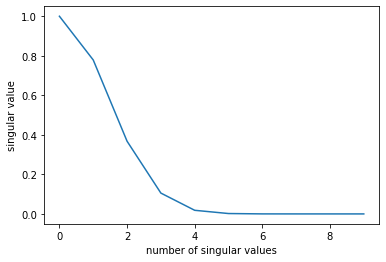

In [69]:
U, s, V = np.linalg.svd(data,full_matrices = False) 
print (U.shape, s.shape, V.shape)
print(s)
plt.plot(s[0:10])
plt.ylabel('singular value')
plt.xlabel('number of singular values')

We can also use the scipy.sparse.linalg libary to compute the SVD for sparse matrices (http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.linalg.svds.html)

We need to specify the number of components, otherwise it is by default k = 6. The singular values are in increasing order.

(100, 50)
(100, 10) (10,) (10, 50)
[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.23409804e-04
 1.93045414e-03 1.83156389e-02 1.05399225e-01 3.67879441e-01
 7.78800783e-01 1.00000000e+00]


Text(0.5, 0, 'number of eigenvalues')

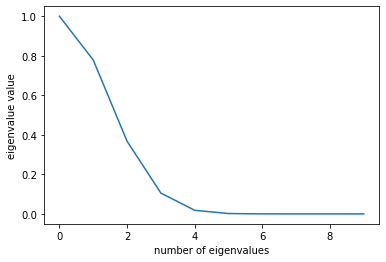

In [70]:
import scipy.sparse.linalg as sp_linalg

data2 = sp_sparse.csc_matrix(data)
print(data2.shape)
U,s,V = sp_linalg.svds(data2, k = 10) #by default returns k=6 singular values
print (U.shape, s.shape, V.shape)
print(s)
plt.plot(s[::-1])
plt.ylabel('eigenvalue value')
plt.xlabel('number of eigenvalues')

We can also compute SVD using the library of SciKit Learn (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html)

In [71]:
from sklearn.decomposition import TruncatedSVD

K = 10
svd = TruncatedSVD(n_components=K)
svd.fit(data2)
print(svd.components_.shape) # the V vectors
print(svd.transform(data2).shape) # the U vectors
print(svd.singular_values_)

(10, 50)
(100, 10)
[1.00000000e+00 7.78800783e-01 3.67879441e-01 1.05399225e-01
 1.83156389e-02 1.93045414e-03 1.23409804e-04 4.78511739e-06
 1.12535175e-07 1.60522805e-09]


### Onbtaining a low rank approximation of the data ###

To obtain a rank-k approximation of the matrix we multiplty the k first columns of U, with the diagonal matrix with the k first (largest) singular values, with the matrix with the first k rows of V transpose

(100, 6) (6,) (6, 50)
[0.00193045 0.01831564 0.10539922 0.36787944 0.77880078 1.        ]


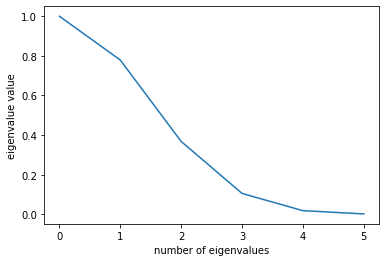

In [73]:
K = 6
U_k,s_k,V_k = sp_linalg.svds(data2, K, which = 'LM')
print (U_k.shape, s_k.shape, V_k.shape)
print(s_k)
plt.plot(s_k[::-1])
plt.ylabel('eigenvalue value')
plt.xlabel('number of eigenvalues')
S_k = np.diag(s_k)

1.3241276917357527
0.8679367165994607
0.3831233278055767
0.10699626662742327
0.018417506182009293
0.0019344006983659258
0.00012350259009393685


Text(0.5, 0, 'rank')

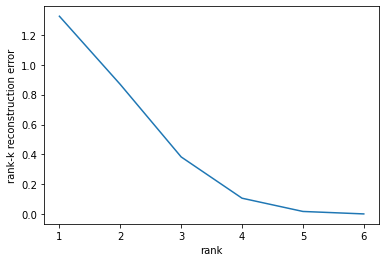

In [75]:
reconstruction_error = []
for k in range(K,0,-1):
    data_k = U_k[:,k:].dot(S_k[k:,k:]).dot(V_k[k:,:])
    error = np.linalg.norm(data_k-data2,ord='fro')
    reconstruction_error.append(error)
    print(error)
data_k = U_k.dot(S_k).dot(V_k)
print(np.linalg.norm(data_k-data2,ord='fro'))

plt.plot(1+np.array(range(6)),reconstruction_error)
plt.ylabel('rank-k reconstruction error')
plt.xlabel('rank')

## An example

We will create a block diagonal matrix, with blocks of different "intensity" of values

In [76]:
import numpy as np

M1 = np.random.randint(1,50,(50,20))
M2 = np.random.randint(1,10,(50,20))
M3 = np.random.randint(1,10,(50,20))
M4 = np.random.randint(1,50,(50,20))

T = np.concatenate((M1,M2),axis=1)
B = np.concatenate((M3,M4),axis=1)
M = np.concatenate([T,B],axis = 0)

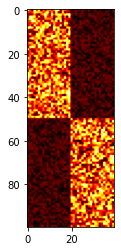

In [77]:
plt.imshow(M, cmap='hot')
plt.show()

We observe that there is a correlation between the column and row sums and the left and right singular vectors

Note: The values of the vectors are negative. We would get the same result if we make them positive.

(-0.9934144337312895, 5.00468040382164e-94)
(-0.9850767934010615, 1.1927248146327699e-30)


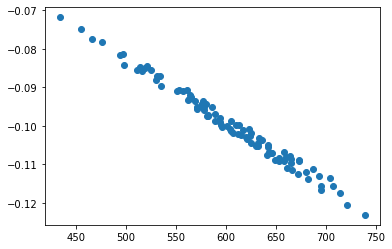

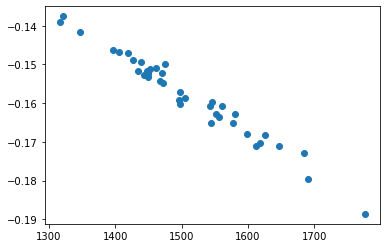

In [78]:
import scipy.stats as stats
import matplotlib.pyplot as plt

(U,S,V) = np.linalg.svd(M,full_matrices = False)
#print(S)
c = M.sum(0)
r = M.sum(1)
print(stats.pearsonr(r,U[:,0]))
print(stats.pearsonr(c,V[0]))
plt.scatter(r,U[:,0])
plt.figure()
plt.scatter(c,V[0])

Using the first two signular vectors we can clearly differentiate the two blocks of rows

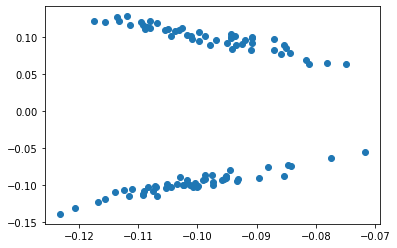

In [79]:
plt.scatter(U[:,0],U[:,1])

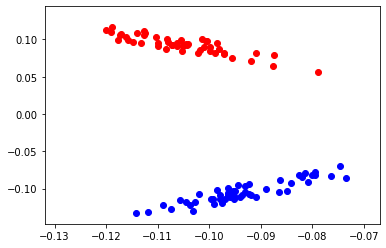

In [163]:
plt.scatter(x = U[:50,0],y = U[:50,1],color='r')
plt.scatter(x = U[50:,0],y = U[50:,1], color = 'b')

## PCA using SciKit Learn

We will now use the PCA package from the SciKit Learn (sklearn) library. PCA is the same as SVD but now the matrix is centered: the mean is removed from the columns of the matrix.

You can read more here: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(M)

PCA(n_components=2)

In [82]:
pca.components_

array([[ 0.14124327,  0.15722362,  0.12228396,  0.15367817,  0.15942344,
         0.17796923,  0.16796   ,  0.14311024,  0.16665599,  0.17718799,
         0.15324126,  0.14189726,  0.15979208,  0.1522675 ,  0.20173536,
         0.15536385,  0.14302179,  0.14447337,  0.16088513,  0.18603015,
        -0.16092718, -0.14470302, -0.13857141, -0.16307114, -0.13340357,
        -0.13714955, -0.17123051, -0.13569162, -0.14348402, -0.15397093,
        -0.14895391, -0.18189587, -0.1676614 , -0.14898163, -0.17193101,
        -0.1671171 , -0.15245651, -0.16778115, -0.17032356, -0.16758541],
       [ 0.11860349,  0.0120605 ,  0.02996427,  0.00920918, -0.01600018,
        -0.00535662,  0.03517382,  0.02117632,  0.14693107, -0.04985701,
        -0.05011393,  0.07806108,  0.12484136,  0.02149389,  0.06889166,
         0.00975357,  0.00113441, -0.00772076,  0.00786862,  0.10276518,
        -0.27367207,  0.26090065, -0.15506362,  0.17944452,  0.27281674,
         0.31594807,  0.34593268, -0.06270117, -0.

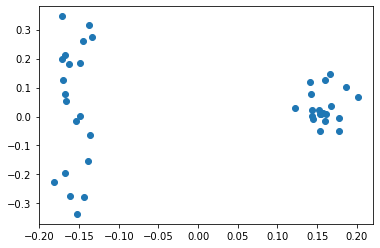

In [83]:
plt.scatter(pca.components_[0],pca.components_[1])

Using the operation transform we can transform the data directly to the lower-dimensional space

In [89]:
MPCA = pca.transform(M)
print(MPCA.shape)

(100, 2)


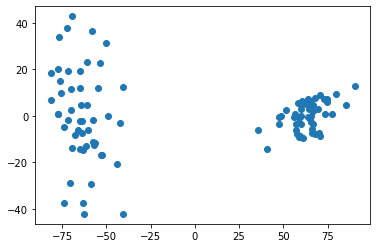

In [90]:
plt.scatter(MPCA[:,0],MPCA[:,1])

We will now experiment with a well-known dataset of data analysis, the iris dataset:

https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [91]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target #contains the labels of the data

pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

In [92]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 ])

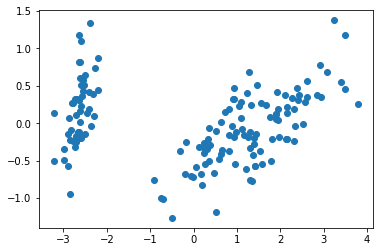

In [93]:
plt.scatter(X[:,0],X[:,1])

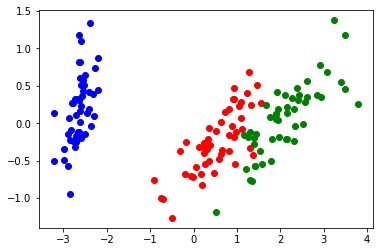

In [94]:
plt.scatter(X[y==0,0],X[y==0,1], color='b')
plt.scatter(X[y==1,0],X[y==1,1], color='r')
plt.scatter(X[y==2,0],X[y==2,1], color='g')

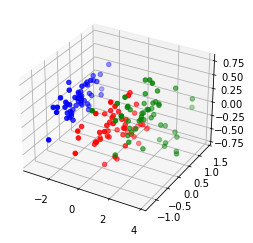

In [95]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[y==0,0],X[y==0,1], X[y==0,2], color='b')
ax.scatter(X[y==1,0],X[y==1,1], X[y==1,2], color='r')
ax.scatter(X[y==2,0],X[y==2,1], X[y==2,2], color='g')

In [96]:
from sklearn.datasets import fetch_20newsgroups

categories = ['comp.os.ms-windows.misc', 'sci.space','rec.sport.baseball']
news_data = fetch_20newsgroups(subset='train', categories=categories)

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', min_df=4,max_df=0.8)
dtm = vectorizer.fit_transform(news_data.data)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize, sent_tokenize


stemmed_data = [" ".join(SnowballStemmer("english", ignore_stopwords=True).stem(word)  
         for sent in sent_tokenize(message)
        for word in word_tokenize(sent))
        for message in news_data.data]

# stemmed_data = news_data.data

In [15]:
dtm = vectorizer.fit_transform(stemmed_data)
terms = vectorizer.get_feature_names()
print(terms)

['00', '000', '0005', '0062', '0096b0f0', '00bjgood', '00mbstultz', '01', '0114', '01wb', '02', '02138', '023017', '024222', '03', '033', '0362', '03i', '03k', '04', '0400', '05', '051746', '06', '0688', '07', '08', '086', '09', '091051', '093231', '0_', '0a', '0b', '0c', '0d', '0e', '0ek', '0f', '0g', '0h', '0hd', '0i', '0iv', '0j', '0k', '0l', '0m', '0m75u', '0n', '0o', '0p', '0q', '0qax', '0qq', '0r', '0s', '0t', '0tbxn', '0tbxom', '0tq', '0tq6', '0u', '0v', '0va', '0w', '0x', '0y', '0z', '10', '100', '1000', '100m', '101', '101044', '102', '1024x768', '1024x768x256', '103', '104', '105', '106', '107', '108', '109', '11', '110', '1100', '111', '11181', '112', '113', '114', '115', '115313', '117', '118', '119', '11th', '12', '120', '1200', '120399', '121', '122', '123', '124', '125', '126', '127', '128', '1280x1024', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '13p', '13q', '13qs', '13s', '14', '140', '1400', '141', '141824', '142', '143', '144'

In [98]:
dtm_dense = dtm.todense()
centered_dtm = dtm_dense - np.mean(dtm_dense, axis=0)
np.sum(centered_dtm,axis=0)[:,:10]

matrix([[ 9.68843061e-16, -5.26054894e-15,  2.83258660e-15,
          5.48389459e-16,  4.95209342e-15,  2.94935517e-15,
          1.01882478e-15, -6.34345007e-15,  1.35613092e-14,
          6.73457600e-15]])

In [99]:
u, s, vt = np.linalg.svd(centered_dtm)

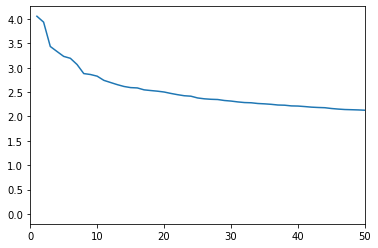

In [100]:
plt.xlim([0,50])
plt.plot(range(1,len(s)+1),s)

<AxesSubplot:>

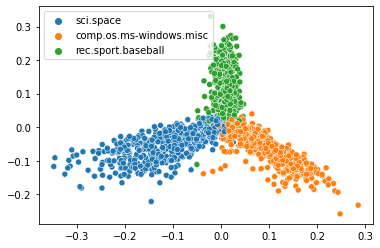

In [101]:
k=2
vectorsk = np.array(u[:,:k] @ np.diag(s[:k]))
labels = [news_data.target_names[i] for i in news_data.target]
sns.scatterplot(x=vectorsk[:,0], y=vectorsk[:, 1], hue=labels)

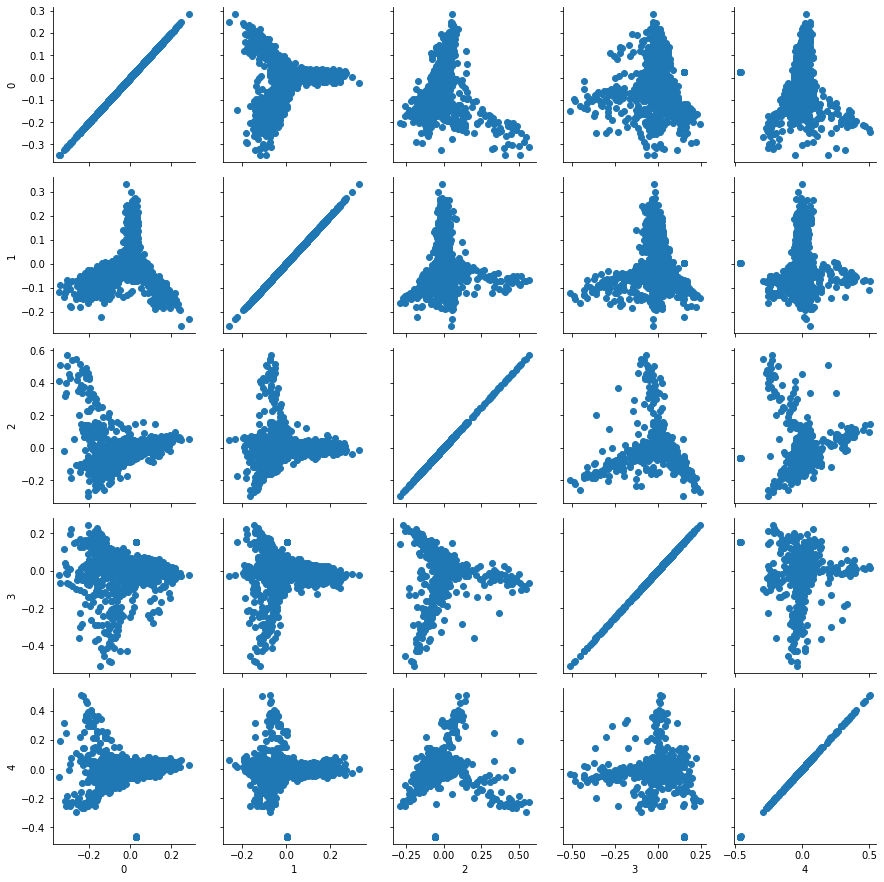

In [102]:
import seaborn as sns
k = 5
Xk = u[:,:k] @ np.diag(s[:k])
X_df = pd.DataFrame(Xk)
g = sns.PairGrid(X_df)
g.map(plt.scatter)

In [104]:
terms = vectorizer.get_feature_names()
for i in range(6):
    top = np.argsort(vt[i])
    topterms = [terms[top[0,f]] for f in range(12)]
    print (i, topterms)

0 ['space', 'henry', 'nasa', 'alaska', 'toronto', 'gov', 'moon', 'zoo', 'aurora', 'spencer', 'nsmca', 'pat']
1 ['windows', 'space', 'access', 'nasa', 'file', 'dos', 'gov', 'digex', 'files', 'use', 'henry', 'program']
2 ['access', 'nasa', 'digex', 'gov', 'pat', 'jpl', 'space', 'baalke', '___', 'com', 'kelvin', '__']
3 ['access', 'digex', 'pat', 'com', 'prb', 'net', 'express', 'online', 'communications', 'dseg', 'usa', 'ti']
4 ['ax', 'henry', 'toronto', 'zoo', 'spencer', 'zoology', 'jpl', 'baalke', '___', 'com', 'gov', 'kelvin']
5 ['nasa', 'gov', 'henry', 'jpl', 'baalke', 'toronto', '___', 'windows', 'kelvin', '__', 'ca', 'team']
